# COMFE
CPSC 300 Software Engineering


In [47]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

## Data Set Exploration

In [48]:
data = pd.read_csv("data_with_dist_to_near.csv")
# data = pd.read_csv("C:\\Users\\swagvillain\\Downloads\\bounding_boxes_with_labels.csv")


# Displaying the first few rows of the data
print(data.head())

   Unnamed: 0  basis_0_0  basis_0_1  basis_0_2  basis_1_0  basis_1_1  \
0           0        0.0        0.0         -1        1.0        0.0   
1           1        0.0        0.0         -1        0.0       -1.0   
2           2        0.0        0.0         -1        0.0       -1.0   
3           3        0.0        0.0         -1        1.0        0.0   
4           4        0.0        0.0         -1        0.0       -1.0   

   basis_1_2  basis_2_0  basis_2_1  basis_2_2  centroid_x  centroid_y  \
0          0        0.0       -1.0        0.0   2115.8066  -403.07547   
1          0       -1.0        0.0        0.0   1771.1365  -772.81445   
2          0       -1.0        0.0        0.0   1660.3745  -769.39650   
3          0        0.0       -1.0        0.0   2115.7854  -301.13824   
4          0       -1.0        0.0        0.0   1364.5340  -774.27930   

   centroid_z  coeffs_x  coeffs_y  coeffs_z  room_ID  
0   1040.0000   18.9688  12.60355   18.9686        0  
1   1040.0000   18

In [49]:
# Summary of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444549 entries, 0 to 444548
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  444549 non-null  int64  
 1   basis_0_0   444549 non-null  float64
 2   basis_0_1   444549 non-null  float64
 3   basis_0_2   444549 non-null  int64  
 4   basis_1_0   444549 non-null  float64
 5   basis_1_1   444549 non-null  float64
 6   basis_1_2   444549 non-null  int64  
 7   basis_2_0   444549 non-null  float64
 8   basis_2_1   444549 non-null  float64
 9   basis_2_2   444549 non-null  float64
 10  centroid_x  444549 non-null  float64
 11  centroid_y  444549 non-null  float64
 12  centroid_z  444549 non-null  float64
 13  coeffs_x    444549 non-null  float64
 14  coeffs_y    444549 non-null  float64
 15  coeffs_z    444549 non-null  float64
 16  room_ID     444549 non-null  int64  
dtypes: float64(13), int64(4)
memory usage: 57.7 MB
None


In [50]:
# Description of data
data.describe(include="all", percentiles=([0.1, 0.25, 0.5, 0.75]))

,Unnamed: 0,basis_0_0,basis_0_1,basis_0_2,basis_1_0,basis_1_1,basis_1_2,basis_2_0,basis_2_1,basis_2_2,centroid_x,centroid_y,centroid_z,coeffs_x,coeffs_y,coeffs_z,room_ID
count,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000,4.445490e+05,4.445490e+05,444549.000000,444549.000000,444549.000000,444549.000000,444549.000000
mean,222274.000000,0.251180,0.006079,-0.061341,-0.006735,0.258686,-0.003068,0.003625,0.000509,0.921573,3.934502e+01,-4.408091e+01,1310.536366,401.185979,166.224182,378.679968,1707.152755
std,128330.386746,0.703435,0.618029,0.239983,0.640778,0.720854,0.063770,0.180837,0.180901,0.291932,9.316225e+03,6.585887e+03,840.411605,456.303614,270.108264,420.258062,1028.713428
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.231559e+06,-8.609601e+05,-3873.100600,0.000000,0.000000,0.000000,0.000000
10%,44454.800000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,-4.796775e+03,-4.761233e+03,368.944500,43.970600,9.000000,4.141800,318.000000
25%,111137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.739387e+03,-2.717543e+03,628.170000,70.000000,21.056250,28.022400,783.000000
50%,222274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3.083760e+01,-2.845314e+01,1195.158000,250.891000,80.567751,225.800500,1683.000000
75%,333411.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.732615e+03,2.697340e+03,1835.520100,521.467072,207.624999,599.999984,2606.000000
max,444548.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.641142e+06,2.111489e+06,22531.111000,19233.657528,17126.019275,7747.200000,3495.000000


### finding rows with co-efficients 0 (flat objects) 

In [51]:
# Filter rows where any of the specified columns have a value of 0.0
filtered_rows = data[(data['coeffs_x'] <= 0.0) ]

# Display the filtered rows
print(filtered_rows)



        Unnamed: 0  basis_0_0  basis_0_1  basis_0_2  basis_1_0  basis_1_1  \
45989        45989        0.0        0.0          0        0.0        0.0   
131377      131377        0.0        0.0          0        0.0        0.0   
172598      172598        0.0        0.0          0        0.0        0.0   
219732      219732        0.0        0.0          0        0.0        0.0   
219733      219733        0.0        0.0          0        0.0        0.0   

        basis_1_2  basis_2_0  basis_2_1  basis_2_2  centroid_x  centroid_y  \
45989           0        0.0        0.0        0.0      0.0000      0.0000   
131377          0        0.0        0.0        0.0  -5185.9490    466.6115   
172598          0        0.0        0.0        0.0   1679.8633  -5765.6206   
219732          0        0.0        0.0        0.0   1520.8103  -1311.0001   
219733          0        0.0        0.0        0.0    909.0677  -1492.1562   

        centroid_z  coeffs_x  coeffs_y  coeffs_z  room_ID  
45989   

### Data Preprocessing

In [52]:
# finding how many duplicate rows we have
data.duplicated().sum()

np.int64(0)

In [53]:
# dropping duplicate rows
data = data.drop_duplicates()

# checking
data.duplicated().sum()

data = data.drop('ID', axis=1)

KeyError: "['ID'] not found in axis"

## Rounding (already done)

In [ ]:
import numpy as np

def round_near_integers(data, threshold=1e-1):
    """
    Round values close to 0, 1, or -1 in a DataFrame to their nearest integers.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        threshold (float): The tolerance for rounding near integers.

    Returns:
        pd.DataFrame: The modified DataFrame with rounded values.
    """
    # Define a rounding function
    def round_values(value):
        if np.isclose(value, 0, atol=threshold):
            return 0
        elif np.isclose(value, 1, atol=threshold):
            return 1
        elif np.isclose(value, -1, atol=threshold):
            return -1
        else:
            return value

    # Identify numeric columns to round, excluding 'ID' and 'room_ID'
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    columns_to_round = [col for col in numeric_columns if col not in ['ID', 'room_ID']]
    
    # Apply rounding function to the selected columns
    data[columns_to_round] = data[columns_to_round].applymap(round_values)
    return data

    


In [ ]:
print(data.head())

   basis_0_0  basis_0_1  basis_0_2  basis_1_0  basis_1_1  basis_1_2  \
0        0.0        0.0         -1        1.0        0.0          0   
1        0.0        0.0         -1        0.0       -1.0          0   
2        0.0        0.0         -1        0.0       -1.0          0   
3        0.0        0.0         -1        1.0        0.0          0   
4        0.0        0.0         -1        0.0       -1.0          0   

   basis_2_0  basis_2_1  basis_2_2  centroid_x  centroid_y  centroid_z  \
0        0.0       -1.0        0.0   2115.8066  -403.07547   1040.0000   
1       -1.0        0.0        0.0   1771.1365  -772.81445   1040.0000   
2       -1.0        0.0        0.0   1660.3745  -769.39650   1040.0000   
3        0.0       -1.0        0.0   2115.7854  -301.13824   2050.9688   
4       -1.0        0.0        0.0   1364.5340  -774.27930   2050.9688   

   coeffs_x  coeffs_y  coeffs_z  room_ID  
0   18.9688  12.60355   18.9686        0  
1   18.9688  12.60355   18.9686        0  

### Correlations and visualization

Let's look at the data correlations. first we split the data into numeric and categorical, then we will look at correlations.

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])



In [ ]:
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,basis_0_0,basis_0_1,basis_0_2,basis_1_0,basis_1_1,basis_1_2,basis_2_0,basis_2_1,basis_2_2,centroid_x,centroid_y,centroid_z,coeffs_x,coeffs_y,coeffs_z,room_ID
basis_0_0,1.000000,-0.003985,0.091271,0.004225,0.835004,0.019387,-0.007158,0.010732,0.098551,-0.002756,0.078305,0.220152,-0.142961,0.017088,-0.194017,0.007465
basis_0_1,-0.003985,1.000000,0.002514,-0.803774,-0.004008,0.012231,-0.014286,-0.000028,0.008997,-0.081739,-0.000679,0.004592,-0.006799,0.000269,-0.010976,0.001286
basis_0_2,0.091271,0.002514,1.000000,0.001270,0.073450,-0.012298,-0.067731,-0.013191,0.806898,0.002470,-0.008573,0.019450,0.195050,0.142421,0.222433,0.003222
basis_1_0,0.004225,-0.803774,0.001270,1.000000,0.004209,-0.000506,0.000170,-0.264976,0.006918,0.105433,0.000669,-0.003905,0.010449,0.002354,0.014973,-0.002628
basis_1_1,0.835004,-0.004008,0.073450,0.004209,1.000000,0.017279,0.227793,-0.000970,0.077883,-0.002209,0.112260,0.214535,-0.144747,0.013086,-0.194862,0.011342
basis_1_2,0.019387,0.012231,-0.012298,-0.000506,0.017279,1.000000,-0.021663,0.017685,0.151858,0.004685,-0.003760,0.046507,0.036713,0.029206,0.041711,0.003450
basis_2_0,-0.007158,-0.014286,-0.067731,0.000170,0.227793,-0.021663,1.000000,0.000087,-0.063282,-0.001130,0.046708,-0.005858,-0.014780,-0.011342,-0.017284,0.004453
basis_2_1,0.010732,-0.000028,-0.013191,-0.264976,-0.000970,0.017685,0.000087,1.000000,-0.008901,-0.033519,-0.005216,0.003105,-0.001756,-0.001489,-0.002439,0.002003
basis_2_2,0.098551,0.008997,0.806898,0.006918,0.077883,0.151858,-0.063282,-0.008901,1.000000,0.006372,-0.009532,0.049251,0.188070,0.151144,0.232696,0.000829
centroid_x,-0.002756,-0.081739,0.002470,0.105433,-0.002209,0.004685,-0.001130,-0.033519,0.006372,1.000000,-0.121047,0.001638,0.000464,0.005142,0.000013,-0.000245


## Modelling Time.
Let's make some models to train on our cleaned and processed data.

## calculating nearest other bounding box

In [ ]:

# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# # Assuming `data` is the DataFrame provided
# data['dist_to_nearest'] = np.inf  # Initialize with infinity for all rows

# # Function to calculate Euclidean distance between two bounding boxes
# def compute_distance(row1, row2, dimensions=['x', 'y', 'z']):
#     deltas = []
#     for dim in dimensions:
#         delta = (row1[f'centroid_{dim}'] - row2[f'centroid_{dim}']) ** 2
#         deltas.append(delta)
#     return np.sqrt(sum(deltas))

# # Iterate over each unique room_ID
# for room_id in tqdm(data['room_ID'].unique(), desc="Processing room_IDs"):
#     room_data = data[data['room_ID'] == room_id]
    
#     # Iterate over each bounding box in the room
#     for i, row in room_data.iterrows():
#         min_distance = np.inf
#         for j, other_row in room_data.iterrows():
#             if i != j:  # Skip the current box itself
#                 dist = compute_distance(row, other_row, dimensions=['x', 'y', 'z'])
#                 min_distance = min(min_distance, dist)
        
#         # Update the distance for this row in the main DataFrame
#         data.at[i, 'dist_to_nearest'] = min_distance

Processing room_IDs: 100%|██████████| 3496/3496 [40:28<00:00,  1.44it/s]  


In [56]:
print(data.head)

data.to_csv('data_with_dist_to_near1.csv')

<bound method NDFrame.head of         Unnamed: 0  basis_0_0  basis_0_1  basis_0_2  basis_1_0  basis_1_1  \
0                0        0.0        0.0         -1        1.0        0.0   
1                1        0.0        0.0         -1        0.0       -1.0   
2                2        0.0        0.0         -1        0.0       -1.0   
3                3        0.0        0.0         -1        1.0        0.0   
4                4        0.0        0.0         -1        0.0       -1.0   
...            ...        ...        ...        ...        ...        ...   
444544      444544        1.0        0.0          0        0.0        1.0   
444545      444545        1.0        0.0          0        0.0        1.0   
444546      444546        1.0        0.0          0        0.0        1.0   
444547      444547        1.0        0.0          0        0.0        1.0   
444548      444548        1.0        0.0          0        0.0        1.0   

        basis_1_2  basis_2_0  basis_2_1  basi

### Adding fake data to the mix

In [ ]:
# Define the number of rows
num_rows = 100000

# Generate random data based on the provided statistics
np.random.seed(42)  # For reproducibility

dummy_data = {
    "basis_0_0": np.random.randint(-1, 1, size=num_rows),
    "basis_0_1": np.random.randint(-1, 1, size=num_rows),
    "basis_0_2": np.random.randint(-1, 1, size=num_rows),
    "basis_1_0": np.random.randint(-1, 1, size=num_rows),
    "basis_1_1": np.random.randint(-1, 1, size=num_rows),
    "basis_1_2": np.random.randint(-1, 1, size=num_rows),
    "basis_2_0": np.random.randint(-1, 1, size=num_rows),
    "basis_2_1": np.random.randint(-1, 1, size=num_rows),
    "basis_2_2": np.random.randint(-1, 1, size=num_rows),
    "centroid_x": np.random.normal(-39345, 9316, size=num_rows),  # mean=39345, std=9316
    "centroid_y": np.random.uniform(-44081, 1000, size=num_rows), # mean=-44081, std=6586
    "centroid_z": np.random.normal(-3873, 22531, size=num_rows),
    "coeffs_x": np.random.uniform(0, 19234, size=num_rows),
    "coeffs_y": np.random.uniform(0, 17126, size=num_rows),
    "coeffs_z": np.random.uniform(0, 7747, size=num_rows),
    "room_ID": np.random.randint(0, 3496, size=num_rows),
    "is_real": 0.0
}

# Convert to a pandas DataFrame
dummy_data = pd.DataFrame(dummy_data)

# Display the first few rows
print(dummy_data.head())

   basis_0_0  basis_0_1  basis_0_2  basis_1_0  basis_1_1  basis_1_2  \
0         -1         -1          0         -1          0          0   
1          0          0          0          0         -1          0   
2         -1          0          0          0          0         -1   
3         -1          0         -1          0          0          0   
4         -1          0         -1          0         -1         -1   

   basis_2_0  basis_2_1  basis_2_2    centroid_x    centroid_y    centroid_z  \
0         -1          0          0 -46196.797960  -1426.188753  24106.959156   
1         -1         -1         -1 -35430.153755 -41052.363085 -14181.839037   
2          0          0         -1 -46220.497137 -25190.300496 -12450.129858   
3          0          0          0 -46592.870297 -18138.643406  19448.650020   
4         -1         -1          0 -40373.167855 -12781.024449  32236.899025   

       coeffs_x      coeffs_y     coeffs_z  room_ID  is_real  
0  17047.347207   5524.027764

### add column to real data

In [ ]:
data['is_real'] = 1

In [ ]:
full_data = pd.concat([data, dummy_data], ignore_index=True)

# print(full_data.head)



### splitting data
We split the data into train and test sets.

In [ ]:


X = full_data.drop(columns=['is_real'])
y = full_data['is_real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking to see if it was split correctly
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("Number of NaN values in y_train:", y_train.isna().sum())



Shape of X_train: (435639, 16)
Shape of X_test: (108910, 16)
Shape of y_train: (435639,)
Shape of y_test: (108910,)
Number of NaN values in y_train: 0


### Decision Tree

making tree classifier and using cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import numpy as np

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Initialize progress bar
progress_bar = tqdm(total=cv.get_n_splits(X_train, y_train), desc="Cross-Validation Progress")

# Perform cross-validation manually to show progress
dt_scores = []
for train_idx, test_idx in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]
    dt_classifier.fit(X_fold_train, y_fold_train)
    dt_scores.append(dt_classifier.score(X_fold_test, y_fold_test))
    progress_bar.update(1)

progress_bar.close()

# Convert scores to a NumPy array for mean and standard deviation calculations
dt_scores = np.array(dt_scores)

# Mean accuracy across folds
print("Mean Accuracy (Decision Tree):", dt_scores.mean())
print("Standard Deviation Accuracy (Decision Tree):", dt_scores.std())


Cross-Validation Progress: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]

Mean Accuracy (Decision Tree): 0.9999701587940615
Standard Deviation Accuracy (Decision Tree): 1.3772813613718435e-05


very low standard deviation above is encouraging.

#### Finding Best Hyperparameters for DT

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameters grid for Decision Tree
# dt_param_grid = {
#     'max_depth': [None, 10, 20, 30],
# }

# # GridSearchCV for Decision Tree
# dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
# dt_grid_search.fit(X_train, y_train)

# # Best parameters for Decision Tree
# print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)
# print("Best Score (Decision Tree):", dt_grid_search.best_score_)

we see that the best max_depth is 10. We will use that below.

#### making final (best) decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(max_depth=10)

# Train the model on the full training set
best_dt_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
dt_test_accuracy = best_dt_classifier.score(X_test, y_test)
print("Test Accuracy (Decision Tree):", dt_test_accuracy)

Test Accuracy (Decision Tree): 0.9999908181066935


### Logistic Regression

#### making the model and using cross validation

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.preprocessing import StandardScaler

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Create Logistic Regression classifier with adjusted parameters
# logreg_classifier = LogisticRegression(max_iter=1000, class_weight='balanced')

# # Use StratifiedKFold for cross-validation
# stratified_cv = StratifiedKFold(n_splits=5)

# # Perform cross-validation for Logistic Regression classifier
# logreg_scores = cross_val_score(logreg_classifier, X_train_scaled, y_train, cv=stratified_cv)

# # Print the cross-validation scores
# print("Cross-Validation Scores (Logistic Regression):", logreg_scores)

# # Print the mean and standard deviation of the cross-validation scores
# print("Mean Accuracy (Logistic Regression):", logreg_scores.mean())
# print("Standard Deviation of Accuracy (Logistic Regression):", logreg_scores.std())


Cross-Validation Scores (Logistic Regression): [0.99977045 0.99982784 0.99982784 0.99983932 0.99975897]
Mean Accuracy (Logistic Regression): 0.9998048842139668
Standard Deviation of Accuracy (Logistic Regression): 3.3265332384301825e-05


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Define the hyperparameters grid for Logistic Regression
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'penalty': ['l2'],  # Penalty term ('l2' for L2 regularization)
#     'solver': ['lbfgs', 'liblinear'],  # Solver ('lbfgs', 'liblinear') to avoid saga issues
#     'class_weight': ['balanced', None]  # Handling class imbalance
# }

# # Use verbose mode to track progress
# grid_search = GridSearchCV(
#     LogisticRegression(max_iter=2000),
#     param_grid,
#     cv=5,
#     verbose=3,  # Enables built-in progress output
#     n_jobs=-1,  # Use all available CPU cores
#     scoring="accuracy"
# )

# grid_search.fit(X_train_scaled, y_train)

# # Best parameters for Logistic Regression
# print("Best Parameters (Logistic Regression):", grid_search.best_params_)
# print("Best Score (Logistic Regression):", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters (Logistic Regression): {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.9998576804429804


#### making final (best) Logistic Regression Model

In [ ]:
# best_logreg_classifier = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

# logreg_classifier.fit(X_train, y_train)

# # Predict labels for the testing set
# y_pred = logreg_classifier.predict(X_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)
# print("Recall:", recall)


Accuracy: 0.9997429069874209
F1 Score: 0.9998424168749015
Recall: 0.9997861492228213


## Prediction and Evaluation
I'll start by copying the code for the best models, then printing and comparing the evaluation metrics for each model.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Train the model on the full training set
best_dt_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 0.9999816362133872
F1 Score: 0.999988744695938
Recall: 0.999988744695938


### Comparison of Models


#### Logistic Regression:
Accuracy: 0.806  
F1 Score: 0.2567049808429119  
Recall: 0.16381418092909536  


#### Decision Tree:
Accuracy: 0.8345  
F1 Score: 0.5153733528550514  
Recall: 0.43031784841075793  


We see that both models are fairly good atcrrectly identifying the positives and have corresponding accuracies. Both models however really struggle with high rates of false negatives. That is, both have poor recall scores; the logistic regression model's is dismal.

The decision tree model out performs my linear regression model, but is by no means perfect, missing more than half of the positives.


### Finding most important features in the decision tree classifier

Top 5 Most Important Features:
centroid_x: 0.973178089576927
basis_2_2: 0.01766595544464557
coeffs_y: 0.00643958234474886
coeffs_x: 0.0011617370146176991
centroid_z: 0.0006943674408122065


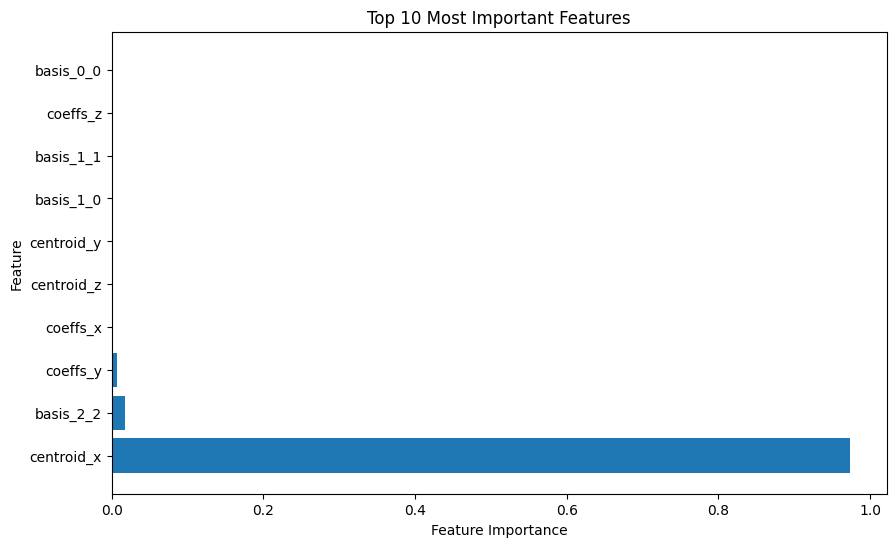

In [ ]:
feature_importances = best_dt_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by their importances
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Top 5 Most Important Features:")
for feature, importance in sorted_features[:5]:
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features[:10])), [imp for _, imp in sorted_features[:10]], align='center')
plt.yticks(range(len(sorted_features[:10])), [feat for feat, _ in sorted_features[:10]])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()